# 1.梯度提升树的鸢尾花数据集实现（小试牛刀）

## 1.1.数据可视化

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from numpy import *

data = datasets.load_iris() 

print('keys: \n', data.keys())

keys: 
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


### 加载sklearn自带的鸢尾花数据集并检查数据集中的索引。

In [9]:
feature_names = data.get('feature_names')

print('feature names: \n', data.get('feature_names')) 
print('target names: \n', data.get('target_names')) 

x = data.get('data') 
y = data.get('target') 

print(x.shape, y.shape)

feature names: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: 
 ['setosa' 'versicolor' 'virginica']
(150, 4) (150,)


### 通过查看数据可以看到数据集中有四种特征，目标数据中有三种结果，总共有150组数据。

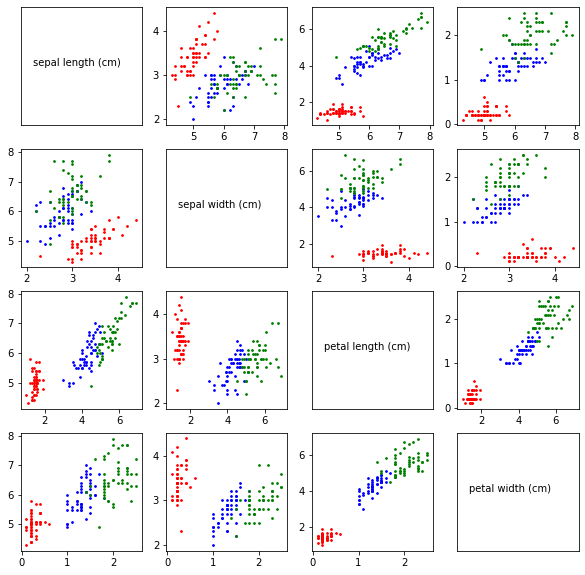

In [10]:
f = []
f.append(y==0) # 类别为第一类的样本的逻辑索引
f.append(y==1) # 类别为第二类的样本的逻辑索引
f.append(y==2) # 类别为第三类的样本的逻辑索引
color = ['red','blue','green']
fig, axes = plt.subplots(4,4,figsize=[10,10]) # 绘制四个属性两两之间的散点图
for i, ax in enumerate(axes.flat):
    row  = i // 4
    col = i % 4
    if row == col:
        ax.text(.1,.5, feature_names[row])
        ax.set_xticks([])
        ax.set_yticks([])
        continue
    for  k in range(3):
        ax.scatter(x[f[k],row], x[f[k],col], c=color[k], s=3)    
fig.subplots_adjust(hspace=0.2, wspace=0.2) 
plt.show()

### 这组图使用散点图来表示四个特征两两之间的关系，合计有12张图。

## 1.2.决策树模型建模和树的呈现

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV



iris_data = load_iris()
X = iris_data.data[0:100, [2, 3]]
y = iris_data.target[0:100]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0)

label_list = ['山鸢尾', '杂色鸢尾']

gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_predprob = gbc.predict_proba(X_test)[:, 1]
print("精准度:{:.4f}".format(metrics.accuracy_score(y_test, y_pred)))
print("AUC分数:{:.4f}".format(metrics.roc_auc_score(y_test, y_predprob)))

精准度:1.0000
AUC分数:1.0000


### 在上述决策树模型中，数据的测试集得了满分，这是一个非常好的结果，然而，实际在数据集的划分中由于随机种子的固定所以这只是一个偶然的结果，想要客观地评估模型还需多次运行测试。

In [36]:
number = 50
num = [] ; precision_score = [] ; AUC_score = []

for i in range(number):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=i)
    gbc = GradientBoostingClassifier(random_state=1)
    gbc.fit(X_train, y_train)
    y_pred = gbc.predict(X_test)
    y_predprob = gbc.predict_proba(X_test)[:, 1]
    
    num.append(i+1)
    precision_score.append(metrics.accuracy_score(y_test, y_pred))
    AUC_score.append(metrics.roc_auc_score(y_test, y_predprob))

mean_precision_score = mean(precision_score)
mean_AUC_score = mean(AUC_score)

print(precision_score)
print(AUC_score)

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


### 将随机种子设置为不固定后，可以看到模型每次运行的结果，通过50次运行的结果再平均较为接近模型实际的性能指数：测试集精确率为1.0，AUC为1.0，为非常好的模型。

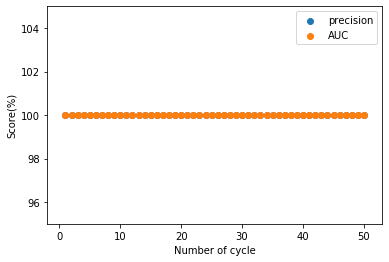

In [42]:
plt.scatter(num,list(map(lambda x:x*100,precision_score)),label='precision')
plt.scatter(num,list(map(lambda x:x*100,AUC_score)),label='AUC')
plt.ylim(95,105)
plt.xlabel('Number of cycle')
plt.ylabel('Score(%)')
plt.legend()
plt.show()

### 通过可视化图像可以更加直观地看到每次运行模型的得分结果。

## 1.3.梯度提升树调参

In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

param_test1 = {'n_estimators': range(20, 81, 10)}
gsearch1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                             min_samples_leaf=20, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10),
                        param_grid=param_test1, scoring='roc_auc', cv=5, return_train_score=True)
gsearch1.fit(X, y)
print('交叉验证流程:\n{}\n最优参数:{}\n平均交叉验证得分:{}'.format(
    gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_))

交叉验证流程:
{'mean_fit_time': array([0.00962682, 0.01596236, 0.01176896, 0.0157052 , 0.01896272,
       0.02123203, 0.02881045]), 'std_fit_time': array([0.0019003 , 0.00417872, 0.00056297, 0.00072218, 0.00059006,
       0.00202201, 0.00163061]), 'mean_score_time': array([0.00238886, 0.00274463, 0.00199175, 0.00168457, 0.00199027,
       0.00124545, 0.00099778]), 'std_score_time': array([1.20005048e-03, 9.15271572e-04, 3.25858108e-06, 9.56800779e-04,
       1.25970164e-03, 3.82139464e-04, 2.55639867e-05]), 'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
             mask=[False, False, False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'n_estimators': 20}, {'n_estimators': 30}, {'n_estimators': 40}, {'n_estimators': 50}, {'n_estimators': 60}, {'n_estimators': 70}, {'n_estimators': 80}], 'split0_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]), 'split1_test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]), 'split2_

### 上述流程将决策树建模、调参和数据处理一起封装在管道中。对于梯度提升树的调参首先寻找最佳的n_estimators，我们的搜寻区间设置为[20,81]，步长为10，交叉验证设置为5折，通过比较它们的AUC得分，最终得到n_estimators最佳参数为20。

In [46]:
param_test2 = {'max_depth': range(
    3, 14, 2), 'min_samples_split': range(100, 801, 200)}
gsearch2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20,
                                                             max_features='sqrt', subsample=0.8, random_state=10),
                        param_grid=param_test2, scoring='roc_auc', cv=5, return_train_score=True)
gsearch2.fit(X, y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.0206768 , 0.02138405, 0.02118874, 0.02292299, 0.02004919,
         0.02096381, 0.01890726, 0.01949854, 0.01878324, 0.01945033,
         0.01901178, 0.01967778, 0.01973505, 0.02216773, 0.01984968,
         0.02022748, 0.02332287, 0.02193232, 0.0183135 , 0.01942234,
         0.02048664, 0.01944966, 0.019134  , 0.01983442]),
  'std_fit_time': array([0.00151757, 0.00108551, 0.00223532, 0.00293246, 0.00195032,
         0.00155901, 0.00094733, 0.00140945, 0.00103407, 0.00264241,
         0.00116378, 0.00087647, 0.00091168, 0.00316181, 0.0018596 ,
         0.00178763, 0.00257688, 0.00241686, 0.00038467, 0.00150834,
         0.00125267, 0.00157442, 0.00119235, 0.00228862]),
  'mean_score_time': array([0.00166459, 0.00120072, 0.00190244, 0.00121183, 0.00121322,
         0.00140929, 0.00100737, 0.00141048, 0.00134606, 0.00132651,
         0.00160675, 0.00141096, 0.00099449, 0.00168338, 0.00139809,
         0.00139666, 0.0011961 , 0.00234618, 0.00115781, 0.00140762,
  

### 然后我们调优的参数是梯度提升树的max_depth最大深度和min_samples_split最小样本分离数,其中max_depth的调优区间为[3,14]，步长为2，min_samples_split的调优区间为[100,801]，步长为200，交叉验证设置为5折，最终得到最优参数分别为3和100。

In [48]:
gbm1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=20, max_depth=3,
                                  min_samples_split=100,  random_state=10)
gbm1.fit(X, y)
y_pred = gbm1.predict(X)
y_predprob = gbm1.predict_proba(X)[:, 1]
print("精准度:{:.4f}".format(metrics.accuracy_score(y, y_pred)))
print("AUC分数(训练集):{:.4f}".format(metrics.roc_auc_score(y, y_predprob)))

精准度:1.0000
AUC分数(训练集):1.0000


### 我们用调参最优的参数建立新的梯度提升树模型，重新对鸢尾花数据集进行了训练，最终精准度和AUC为1，1。

### 总结：
### 在学习决策树的过程中，我们首先通过针对sklearn中自带的iris_data鸢尾花数据集进行了建模训练过程，通过完整的数据处理、建模、预测评估的机器学习流程加强了对于梯度提升树原理的理解以及机器学习操作的熟练度。
### iris_data鸢尾花数据集是非常友好的数据集，更类似于一个toy-model，所以为了更进一步掌握梯度提升树并将其应用到实际场景中，接下来我们挑选更加真实的数据集使用梯度提升树来进行训练。





# 2.基于机器学习的AI审计预测（项目实战）

## 我们选用的数据集为中国事务所2016-2021年的审计数据，数据的Y只有0和1两个值，是典型和二分类问题，我们希望能够使用梯度提升分类树对事务所前五年即2016-2020年的数据以对后一年即2021年的数据进行预测。所以2016-2020年的数据为我们的训练集，2021年为我们的测试集。

## 2.1.数据导入和处理

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc,roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score,precision_score


train_years = [2016,2017,2018,2019,2020]
test_year = [2021]

#提取数据

Ind_names = ['stkcd','year']
feature_names = ['Big4','Opinion','Size','Loss','ROA2','Dual','TenureAUT','LnSubsidy','CL_AF','Growth21']
target_name = ['YchangeAUT']
# data_X = pd.read_excel('data/4.12 处理数据/事务所变更预测（第三版）.xls',usecols='A:V')
# data_Y = pd.read_excel('data/4.12 处理数据/事务所变更预测（第三版）.xls',usecols='W')

# train_X,train_Y,train_index = [],[],[]
# test_X,test_Y,test_index = [],[],[]
# data = []

# for i in range(len(data_X['year'])):
#     t1x,t2x,t1index,t2index = [],[],[],[]
#     if data_X['year'][i] in train_years:
#         t1x = [data_X['Big4'][i],data_X['Opinion'][i],data_X['Size'][i],data_X['Loss'][i],data_X['ROA2'][i],data_X['Dual'][i],data_X['TenureAUT'][i],
#             data_X['LnSubsidy'][i],data_X['CL_AF'][i],data_X['Growth21'][i]]
#         t1index = [data_X['stkcd'][i],data_X['year'][i]]
#         train_X.append(t1x)
#         train_Y.append(data_Y['YchangeAUT'][i])
#         train_index.append(t1index)
#         data.append([data_X['Big4'][i],data_X['Opinion'][i],data_X['Size'][i],data_X['Loss'][i],data_X['ROA2'][i],data_X['Dual'][i],data_X['TenureAUT'][i],
#             data_X['LnSubsidy'][i],data_X['CL_AF'][i],data_X['Growth21'][i],data_Y['YchangeAUT'][i]])
#     elif data_X['year'][i] in test_year:
#         t2x = [data_X['Big4'][i],data_X['Opinion'][i],data_X['Size'][i],data_X['Loss'][i],data_X['ROA2'][i],data_X['Dual'][i],data_X['TenureAUT'][i],
#             data_X['LnSubsidy'][i],data_X['CL_AF'][i],data_X['Growth21'][i]]
#         t2index = [data_X['stkcd'][i],data_X['year'][i]]
#         test_X.append(t2x)
#         test_Y.append(data_Y['YchangeAUT'][i])
#         test_index.append(t2index)
#         data.append([data_X['Big4'][i],data_X['Opinion'][i],data_X['Size'][i],data_X['Loss'][i],data_X['ROA2'][i],data_X['Dual'][i],data_X['TenureAUT'][i],
#             data_X['LnSubsidy'][i],data_X['CL_AF'][i],data_X['Growth21'][i],data_Y['YchangeAUT'][i]])

# train_X,train_Y,train_index = np.array(train_X),np.array(train_Y),np.array(train_index)
# test_X,test_Y,test_index = np.array(test_X),np.array(test_Y),np.array(test_index)



# datahead = ['Big4','Opinion','Size','Loss','ROA2','Dual','TenureAUT','LnSubsidy','CL_AF','Growth21','YchangeAUT']
# df = pd.DataFrame(data,columns=datahead)
# df.to_csv('data/data.csv',index=False)


# np.save('data/{}/trainx.npy'.format(test_year[0]),train_X)
# np.save('data/{}/trainy.npy'.format(test_year[0]),train_Y)
# np.save('data/{}/testx.npy'.format(test_year[0]),test_X)
# np.save('data/{}/testy.npy'.format(test_year[0]),test_Y)
# np.save('data/{}/trainindex.npy'.format(test_year[0]),train_index)
# np.save('data/{}/testindex.npy'.format(test_year[0]),test_index)

### 事务所数据存放在excel表格中，为了后续数据处理和运用的方便，这里我们先通过pandas和numpy两个包来进行文件处理将相关数据提取出来并存为CSV形式便于调用。处理过程中我们以年份为索引来提取出我们想要的数据集，以2016-2020年的数据为训练集，2021年的数据为测试集，数据提取出来后我们将训练集和测试集的X、y以及索引分别存为数据集文件。

In [50]:
print('数据集的标签为:', Ind_names)
print('数据集的特征为：', feature_names)
print('数据集的目标为：', target_name)

数据集的标签为: ['stkcd', 'year']
数据集的特征为： ['Big4', 'Opinion', 'Size', 'Loss', 'ROA2', 'Dual', 'TenureAUT', 'LnSubsidy', 'CL_AF', 'Growth21']
数据集的目标为： ['YchangeAUT']


### 数据集的标签index的作用是用于区别不同事务所的ID和不同年份的数据

## 2.2.数据分析

In [51]:
df = pd.read_csv('data/data.csv')
df.head()

,Big4,Opinion,Size,Loss,ROA2,Dual,TenureAUT,LnSubsidy,CL_AF,Growth21,YchangeAUT
0,0,0,21.233084,0,0.078630,0,2,2.397895,0.091432,1,0
1,0,0,20.603300,0,0.023330,0,3,1.945910,0.012307,1,0
2,0,0,21.666409,0,0.037382,0,4,1.945910,0.057177,0,0
3,0,0,21.938717,0,0.024194,0,3,2.833213,0.150004,1,1
4,0,1,20.567089,0,0.007702,0,4,3.332205,0.020154,0,0


### 我们通过读取之前处理过的CSV文件来对数据进行分析。

In [52]:
df.shape

(5427, 11)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5427 entries, 0 to 5426
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Big4        5427 non-null   int64  
 1   Opinion     5427 non-null   int64  
 2   Size        5427 non-null   float64
 3   Loss        5427 non-null   int64  
 4   ROA2        5427 non-null   float64
 5   Dual        5427 non-null   int64  
 6   TenureAUT   5427 non-null   int64  
 7   LnSubsidy   5427 non-null   float64
 8   CL_AF       5427 non-null   float64
 9   Growth21    5427 non-null   int64  
 10  YchangeAUT  5427 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 466.5 KB


### 通过pandas自带的功能模块我们可以看到数据集每一维度特征的数据类型和数据个数，由于数据集是我们事先通过相关专业知识处理过的，所以这里的数据都是数值型的，并没有对象型的特征。

In [54]:
df.columns

Index(['Big4', 'Opinion', 'Size', 'Loss', 'ROA2', 'Dual', 'TenureAUT',
       'LnSubsidy', 'CL_AF', 'Growth21', 'YchangeAUT'],
      dtype='object')

In [55]:
df.isnull().sum()

Big4          0
Opinion       0
Size          0
Loss          0
ROA2          0
Dual          0
TenureAUT     0
LnSubsidy     0
CL_AF         0
Growth21      0
YchangeAUT    0
dtype: int64

### 由于数据集是提前处理过的，所以并没有缺失值。

In [56]:
df.describe()

,Big4,Opinion,Size,Loss,ROA2,Dual,TenureAUT,LnSubsidy,CL_AF,Growth21,YchangeAUT
count,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000
mean,0.032983,0.081076,21.291670,0.128616,0.030007,0.149069,6.296481,2.045416,0.044324,0.427676,0.239174
std,0.178609,0.272977,1.055499,0.334805,0.079579,0.356190,3.807861,0.794529,0.059735,0.494787,0.426619
min,0.000000,0.000000,18.839172,0.000000,-0.333861,0.000000,1.000000,0.693147,0.000003,0.000000,0.000000
25%,0.000000,0.000000,20.592272,0.000000,0.009828,0.000000,3.000000,1.386294,0.010046,0.000000,0.000000
50%,0.000000,0.000000,21.218893,0.000000,0.031950,0.000000,6.000000,2.079442,0.022779,0.000000,0.000000
75%,0.000000,0.000000,21.911495,0.000000,0.063360,0.000000,9.000000,2.564949,0.051941,1.000000,0.000000
max,1.000000,1.000000,25.928284,1.000000,0.244113,1.000000,20.000000,4.962845,0.302246,1.000000,1.000000


### 数据集的相关信息

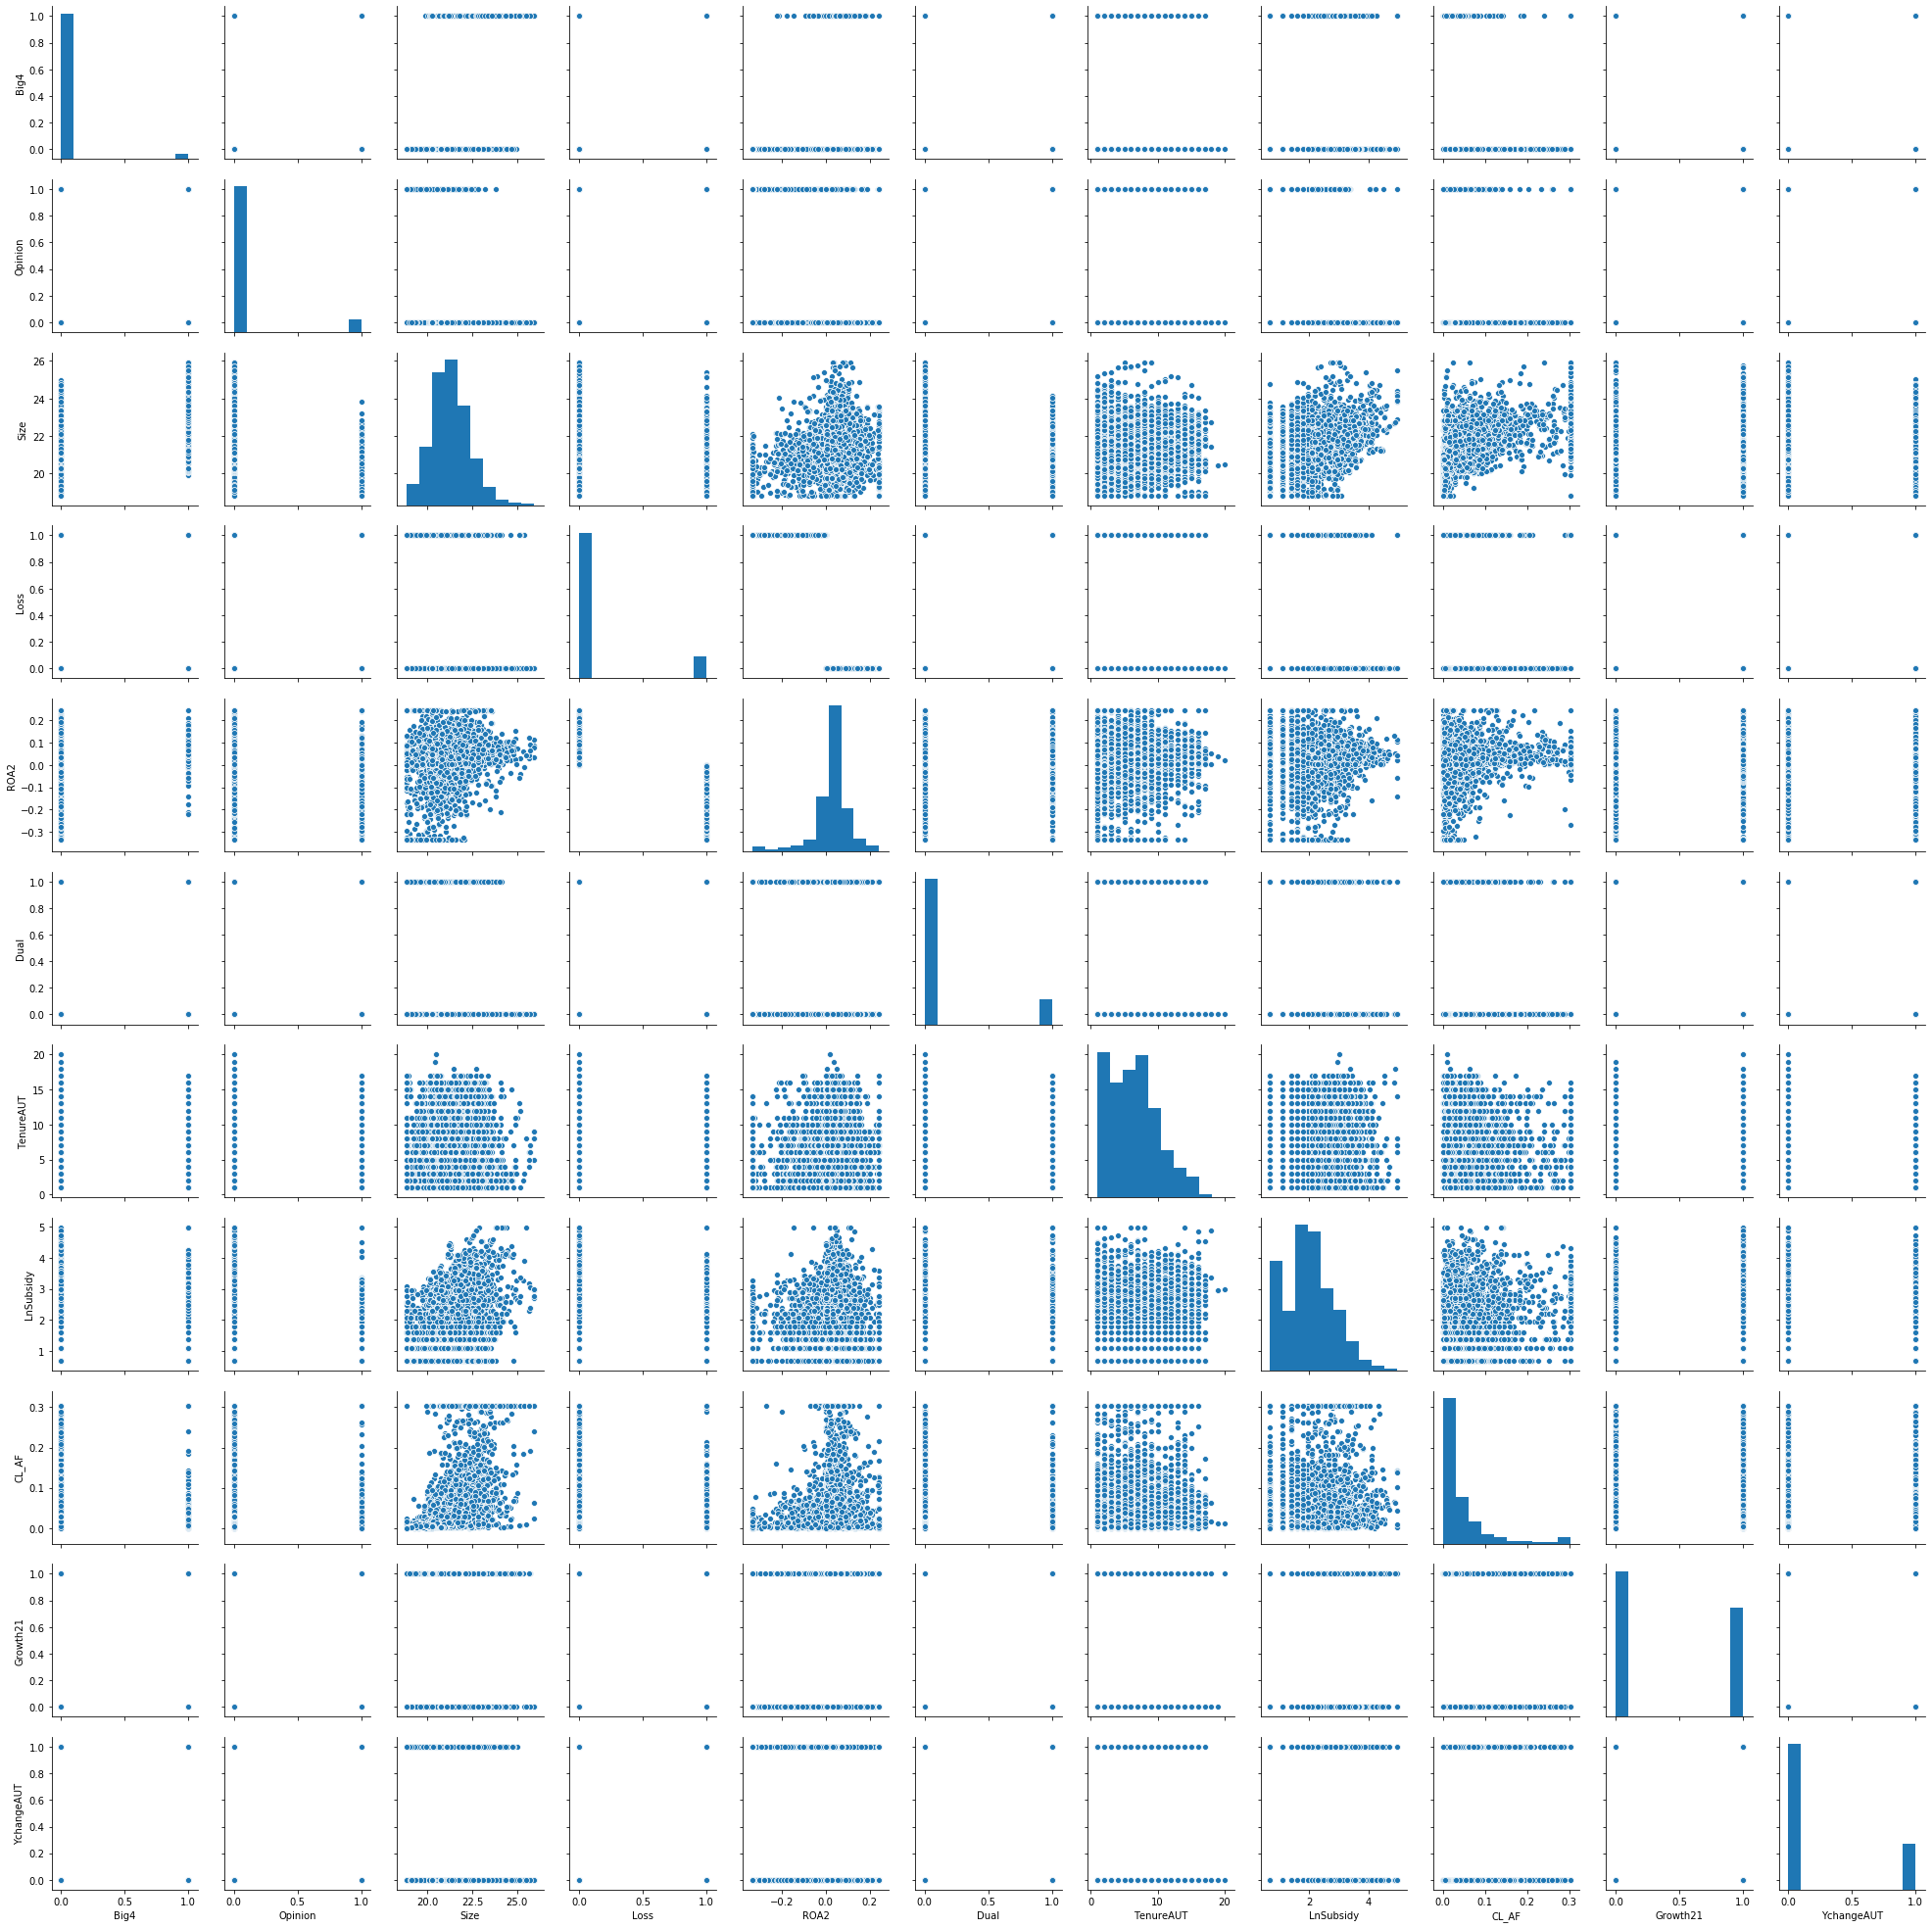

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df) 
plt.show()

### 使用Matplotlib和Seaborn工具包对数据可视化，我们对数据进行分布分析，上图对角线为每个特征的分布分析，而其它位置为对两两特征之间进行联合绘图。

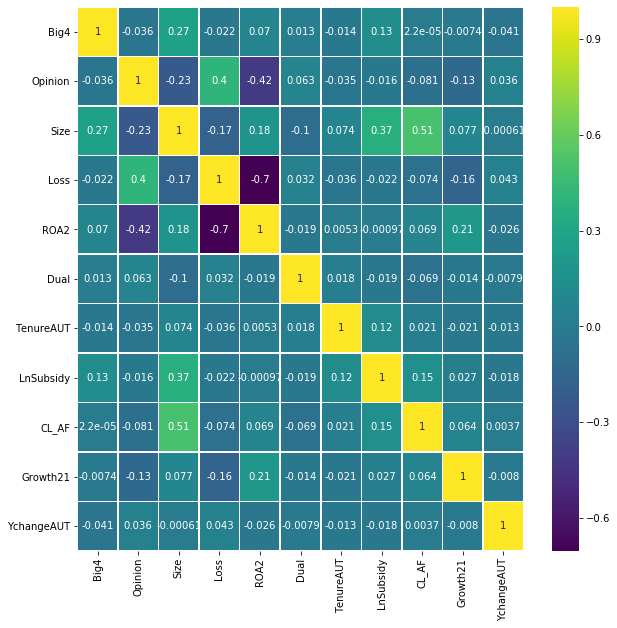

In [59]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

### 我们借助pandas工具包的相关性计算和热力图呈现对数据进行相关性分析。可以看到对角线位置为特征本身的相关性所以为1，而其它位置为两两特征之间的相关性，相关性的值在0到1之间，越大则相关性越强，从图中可以看到所有特征之间的相关性都较低，所以特征之间的相关性很低，并不需要对特征进行清洗。

In [65]:
df_topaffected=df.sort_values(by='YchangeAUT',ascending=False) 
df_topaffected.head(20)

,Big4,Opinion,Size,Loss,ROA2,Dual,TenureAUT,LnSubsidy,CL_AF,Growth21,YchangeAUT
2713,0,0,20.923897,0,0.009361,0,11,2.397895,0.008063,0,1
2386,0,0,20.379950,0,0.104947,0,2,1.098612,0.005760,1,1
2426,0,0,20.900719,0,0.045905,0,3,2.079442,0.046490,1,1
2422,0,0,21.105497,0,0.046344,0,4,2.484907,0.025906,1,1
2421,0,0,21.093346,0,0.006886,0,8,2.197225,0.009722,0,1
2418,0,0,21.848194,0,0.030360,0,2,1.609438,0.015104,1,1
2411,0,0,20.485819,0,0.048063,0,1,1.098612,0.006403,0,1
2407,0,0,21.165535,0,0.035168,0,3,2.197225,0.027509,0,1
2406,0,0,20.671299,0,0.018683,0,13,2.197225,0.004656,0,1
2400,0,0,20.559317,0,0.081217,1,2,1.609438,0.006891,0,1


### 在我们的二分类问题中，大部分数据的Y为0，这里通过排序我们查看了20个Y为1的数据。

## 2.3.梯度提升树建模与评估

acc= 0.6664275466284074
recall= 0.3883495145631068
precision= 0.09049773755656108


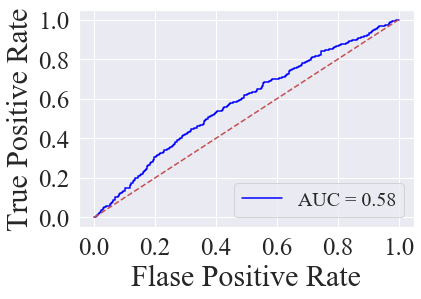

In [69]:
train_x,train_y,test_x,test_y = np.load('data/{}/trainx.npy'.format(test_year[0])),np.load('data/{}/trainy.npy'.format(test_year[0])),np.load('data/{}/testx.npy'.format(test_year[0])),np.load('data/{}/testy.npy'.format(test_year[0]))


tree = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=0.8
                                  , min_samples_split=2, min_samples_leaf=1, max_depth=20
                                  , init=None, random_state=111, max_features=None
                                  , verbose=0, max_leaf_nodes=None, warm_start=False)

tree.fit(train_x,train_y)
predict_target=tree.predict(test_x)
predict_target_prob=tree.predict_proba(test_x)  # 输出分类概率
predict_target_prob_dt=predict_target_prob[:,1]
predict_target_p0 = predict_target_prob[:,0]

acc = accuracy_score(test_y, predict_target)
print("acc=", acc)

r1 = recall_score(predict_target,test_y)
print('recall=', r1)

r2 = precision_score(predict_target,test_y)
print('precision=', r2)

def Draw_ROC(list1,list2):
    fpr_model,tpr_model,thresholds=roc_curve(list1,list2,pos_label=1)
    roc_auc_model=auc(fpr_model,tpr_model)

    font = {'family': 'Times New Roman',
            'size': 12,
            }
    sns.set(font_scale=1.2)
    plt.rc('font',family='Times New Roman')

    plt.plot(fpr_model,tpr_model,'blue',label='AUC = %0.2f'% roc_auc_model)
    plt.legend(loc='lower right',fontsize = 20)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate',fontsize = 30)
    plt.xlabel('Flase Positive Rate',fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.show()
    return

t = Draw_ROC(test_y,predict_target_prob_dt)

### 我们使用sklearn工具包中的梯度提升分类树来进行建模，并用accuracy，精确率，召回率以及AUC来对结果进行评估，可以看到结果并不太理想，这更加说明了我们的数据集和鸢尾花数据集的区别，并无法直接用简单的建模就能得到更好的结果。接下来我们首先通过和其它模型对比来验证我们的梯度提升分类树是否并不太合适此问题。

Acc_lr= 0.6829268292682927
recall_lr= 0.0
precision_lr= 0.0
Acc_DTC= 0.6657101865136298
recall_DTC= 0.18421052631578946
precision_DTC= 0.01583710407239819


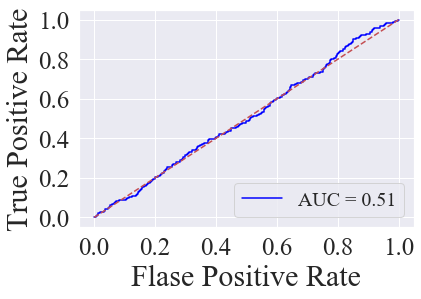

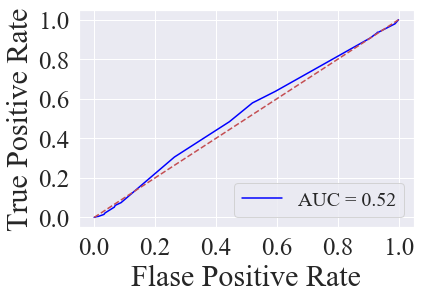

In [72]:
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression()
lr.fit(train_x,train_y)
predict_target_lr=lr.predict(test_x)
predict_target_prob_lr = lr.predict_proba(test_x)[:,1]

DTC = DecisionTreeClassifier(max_depth=5,random_state=0)
DTC.fit(train_x, train_y)
predict_target_DTC=DTC.predict(test_x)
predict_target_prob_DTC=DTC.predict_proba(test_x)[:,1]

acc_lr = accuracy_score(test_y, predict_target_lr)
acc_DTC = accuracy_score(test_y, predict_target_DTC)

r1_lr = recall_score(predict_target_lr,test_y)
r1_DTC = recall_score(predict_target_DTC,test_y)

r2_lr = precision_score(predict_target_lr,test_y)
r2_DTC = precision_score(predict_target_DTC,test_y)
print("Acc_lr=", acc_lr)
print('recall_lr=', r1_lr)
print('precision_lr=', r2_lr)
print("Acc_DTC=", acc_DTC)
print('recall_DTC=', r1_DTC)
print('precision_DTC=', r2_DTC)

t_lr = Draw_ROC(test_y,predict_target_prob_lr)
t_DTC = Draw_ROC(test_y,predict_target_prob_DTC)

In [79]:
from prettytable import PrettyTable

table = PrettyTable(['model','acc','recall','precision','AUC'])
table.align['model'] = '1'
table.padding_width = 1
table.add_row(['GBDT',0.67,0.39,0.09,0.58])
table.add_row(['Lg',0.68,0.0,0.0,0.51])
table.add_row(['DTC',0.67,0.18,0.02,0.52])

print(table)

+-------+------+--------+-----------+------+
| model | acc  | recall | precision | AUC  |
+-------+------+--------+-----------+------+
|  GBDT | 0.67 |  0.39  |    0.09   | 0.58 |
|   Lg  | 0.68 |  0.0   |    0.0    | 0.51 |
|  DTC  | 0.67 |  0.18  |    0.02   | 0.52 |
+-------+------+--------+-----------+------+


### 这里我们构建了逻辑回归模型和DTC决策分类树模型来和梯度提升树进行对比，可以看到和梯度提升树相比，同样可以用来处理二分类问题的逻辑回归和DTC的各项指标结果更差，AUC接近0.5，完全等价于随机分类器。所以这里说明了对于此问题梯度提升分类树的优异性，我们依然采用此模型，并对数据和模型进行改进以优化结果。

## 2.4.过采样与欠采样

acc= 0.5344332855093257
recall= 0.3691529709228824
precision= 0.6606334841628959


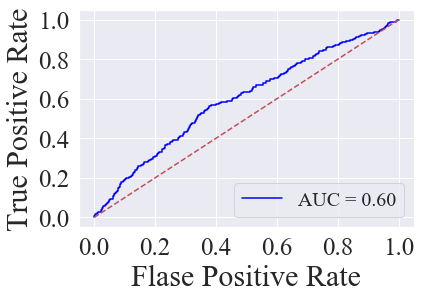

acc= 0.6599713055954088
recall= 0.4166666666666667
precision= 0.18099547511312217


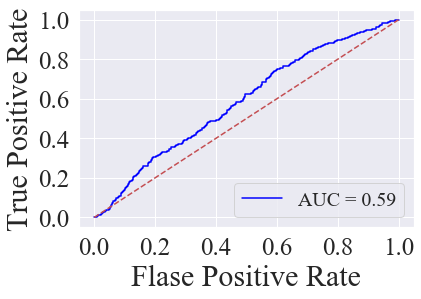

In [73]:
##欠采样
t_x,t_y,test_x,test_y = np.load('data/{}/trainx.npy'.format(test_year[0])),np.load('data/{}/trainy.npy'.format(test_year[0])),np.load('data/{}/testx.npy'.format(test_year[0])),np.load('data/{}/testy.npy'.format(test_year[0]))

rus = RandomUnderSampler(random_state=0)
train_x,train_y = rus.fit_resample(t_x,t_y)

tree = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=0.8
                                  , min_samples_split=2, min_samples_leaf=1, max_depth=20
                                  , init=None, random_state=111, max_features=None
                                  , verbose=0, max_leaf_nodes=None, warm_start=False)

tree.fit(train_x,train_y)
predict_target=tree.predict(test_x)
predict_target_prob=tree.predict_proba(test_x)  # 输出分类概率
predict_target_prob_dt=predict_target_prob[:,1]
predict_target_p0 = predict_target_prob[:,0]

acc = accuracy_score(test_y, predict_target)
print("acc=", acc)

r1 = recall_score(predict_target,test_y)
print('recall=', r1)

r2 = precision_score(predict_target,test_y)
print('precision=', r2)

def Draw_ROC(list1,list2):
    fpr_model,tpr_model,thresholds=roc_curve(list1,list2,pos_label=1)
    roc_auc_model=auc(fpr_model,tpr_model)

    font = {'family': 'Times New Roman',
            'size': 12,
            }
    sns.set(font_scale=1.2)
    plt.rc('font',family='Times New Roman')

    plt.plot(fpr_model,tpr_model,'blue',label='AUC = %0.2f'% roc_auc_model)
    plt.legend(loc='lower right',fontsize = 20)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate',fontsize = 30)
    plt.xlabel('Flase Positive Rate',fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.show()
    return

t = Draw_ROC(test_y,predict_target_prob_dt)

##过采样

t_x,t_y,test_x,test_y = np.load('data/{}/trainx.npy'.format(test_year[0])),np.load('data/{}/trainy.npy'.format(test_year[0])),np.load('data/{}/testx.npy'.format(test_year[0])),np.load('data/{}/testy.npy'.format(test_year[0]))

smote = SMOTE(random_state=0)
train_x,train_y = smote.fit_resample(t_x,t_y)

tree = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=0.8
                                  , min_samples_split=2, min_samples_leaf=1, max_depth=20
                                  , init=None, random_state=111, max_features=None
                                  , verbose=0, max_leaf_nodes=None, warm_start=False)

tree.fit(train_x,train_y)
predict_target=tree.predict(test_x)
predict_target_prob=tree.predict_proba(test_x)  # 输出分类概率
predict_target_prob_dt=predict_target_prob[:,1]
predict_target_p0 = predict_target_prob[:,0]

acc = accuracy_score(test_y, predict_target)
print("acc=", acc)

r1 = recall_score(predict_target,test_y)
print('recall=', r1)

r2 = precision_score(predict_target,test_y)
print('precision=', r2)

def Draw_ROC(list1,list2):
    fpr_model,tpr_model,thresholds=roc_curve(list1,list2,pos_label=1)
    roc_auc_model=auc(fpr_model,tpr_model)

    font = {'family': 'Times New Roman',
            'size': 12,
            }
    sns.set(font_scale=1.2)
    plt.rc('font',family='Times New Roman')

    plt.plot(fpr_model,tpr_model,'blue',label='AUC = %0.2f'% roc_auc_model)
    plt.legend(loc='lower right',fontsize = 20)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate',fontsize = 30)
    plt.xlabel('Flase Positive Rate',fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.show()
    return

t = Draw_ROC(test_y,predict_target_prob_dt)

In [78]:
from prettytable import PrettyTable

table = PrettyTable(['sampling','acc','recall','precision','AUC'])
table.align['sampling'] = '1'
table.padding_width = 1
table.add_row(['No',0.67,0.39,0.09,0.58])
table.add_row(['Under_Samp',0.53,0.37,0.67,0.60])
table.add_row(['Over_Samp',0.66,0.42,0.18,0.59])

print(table)

+------------+------+--------+-----------+------+
|  sampling  | acc  | recall | precision | AUC  |
+------------+------+--------+-----------+------+
|     No     | 0.67 |  0.39  |    0.09   | 0.58 |
| Under_Samp | 0.53 |  0.37  |    0.67   | 0.6  |
| Over_Samp  | 0.66 |  0.42  |    0.18   | 0.59 |
+------------+------+--------+-----------+------+


### 可以看到，通过采样的手段处理数据之后，模型的性能得以提升，原因在于我们的事务所数据中的Y大部分为0，只有小部分为1，所以导致数据类别失衡，通过过采样或者欠采样使这种现象稍微得以改善，其中欠采样的效果更好，所以后续我们以欠采样的数据为准。

## 2.5.梯度提升树阈值边界

acc= 0.5624103299856528
recall= 0.38
precision= 0.6018099547511312


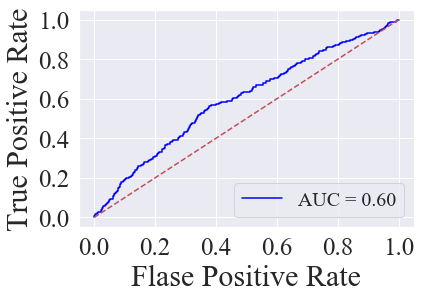

In [85]:
##欠采样
t_x,t_y,test_x,test_y = np.load('data/{}/trainx.npy'.format(test_year[0])),np.load('data/{}/trainy.npy'.format(test_year[0])),np.load('data/{}/testx.npy'.format(test_year[0])),np.load('data/{}/testy.npy'.format(test_year[0]))

rus = RandomUnderSampler(random_state=0)
train_x,train_y = rus.fit_resample(t_x,t_y)

tree = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=0.8
                                  , min_samples_split=2, min_samples_leaf=1, max_depth=20
                                  , init=None, random_state=111, max_features=None
                                  , verbose=0, max_leaf_nodes=None, warm_start=False)

tree.fit(train_x,train_y)
predict_target_prob=tree.predict_proba(test_x)  # 输出分类概率
predict_target_prob_dt=predict_target_prob[:,1]
predict_target_p0 = predict_target_prob[:,0]


##修改阈值
predict_target = []
for i in range(len(predict_target_prob)):
    if predict_target_prob[i][1] > 0.7:
        predict_target.append(1)
    elif predict_target_prob[i][1] <= 0.7:
        predict_target.append(0)
##


acc = accuracy_score(test_y, predict_target)
print("acc=", acc)

r1 = recall_score(predict_target,test_y)
print('recall=', r1)

r2 = precision_score(predict_target,test_y)
print('precision=', r2)

def Draw_ROC(list1,list2):
    fpr_model,tpr_model,thresholds=roc_curve(list1,list2,pos_label=1)
    roc_auc_model=auc(fpr_model,tpr_model)

    font = {'family': 'Times New Roman',
            'size': 12,
            }
    sns.set(font_scale=1.2)
    plt.rc('font',family='Times New Roman')

    plt.plot(fpr_model,tpr_model,'blue',label='AUC = %0.2f'% roc_auc_model)
    plt.legend(loc='lower right',fontsize = 20)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate',fontsize = 30)
    plt.xlabel('Flase Positive Rate',fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.show()
    return

t = Draw_ROC(test_y,predict_target_prob_dt)

### 结合此二分类问题实例，最终Y的分类边界概率并不是0.5，而应该是0.7，所以我们修改了梯度提升分类树的阈值边界使最终的结果更加合理。

## 2.6.梯度提升树调参优化

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

t_x,t_y,test_x,test_y = np.load('data/{}/trainx.npy'.format(test_year[0])),np.load('data/{}/trainy.npy'.format(test_year[0])),np.load('data/{}/testx.npy'.format(test_year[0])),np.load('data/{}/testy.npy'.format(test_year[0]))

rus = RandomUnderSampler(random_state=0)
train_x,train_y = rus.fit_resample(t_x,t_y)

param_test1 = {'n_estimators': range(20, 200, 10)}
gsearch1 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                                                             min_samples_leaf=20, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10),
                        param_grid=param_test1, scoring='roc_auc', cv=5, return_train_score=True)
gsearch1.fit(train_x, train_y)
print('交叉验证流程:\n{}\n最优参数:{}\n平均交叉验证得分:{}'.format(
    gsearch1.cv_results_, gsearch1.best_params_, gsearch1.best_score_))

交叉验证流程:
{'mean_fit_time': array([0.02298627, 0.03346205, 0.04467497, 0.05267396, 0.06490884,
       0.07383084, 0.08411603, 0.09532914, 0.10520859, 0.11587219,
       0.1271101 , 0.13854022, 0.15082736, 0.16762357, 0.17622252,
       0.17943034, 0.19020844, 0.19963384]), 'std_fit_time': array([0.00153225, 0.00125347, 0.00376027, 0.00148926, 0.00178267,
       0.0013579 , 0.00091796, 0.00126274, 0.00104038, 0.00060902,
       0.0012061 , 0.0029559 , 0.00459018, 0.00700828, 0.00593966,
       0.00205239, 0.00181041, 0.00145935]), 'mean_score_time': array([0.00139518, 0.00118752, 0.00159478, 0.00139971, 0.07124848,
       0.00159168, 0.0018713 , 0.00155997, 0.001999  , 0.0021091 ,
       0.00179315, 0.00179543, 0.0021975 , 0.00250707, 0.00211802,
       0.00239415, 0.0021986 , 0.00219679]), 'std_score_time': array([4.90318816e-04, 3.96756810e-04, 4.87485928e-04, 4.87223365e-04,
       1.38504171e-01, 4.85422218e-04, 4.62005561e-04, 4.64021408e-04,
       8.89349238e-06, 2.28858062e-04, 3.

In [87]:
param_test2 = {'max_depth': range(
    3, 20, 2), 'min_samples_split': range(100, 801, 100)}
gsearch2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, min_samples_leaf=20,
                                                             max_features='sqrt', subsample=0.8, random_state=10),
                        param_grid=param_test2, scoring='roc_auc', cv=5, return_train_score=True)
gsearch2.fit(X, y)
gsearch2.cv_results_, gsearch2.best_params_, gsearch2.best_score_

({'mean_fit_time': array([0.02646227, 0.02683096, 0.02650647, 0.02652564, 0.02569728,
         0.02573962, 0.02563262, 0.02639699, 0.02582211, 0.02559643,
         0.02580414, 0.02562523, 0.02608457, 0.02569518, 0.02562523,
         0.02604094, 0.02520051, 0.02546873, 0.02574267, 0.02619886,
         0.02629619, 0.0257349 , 0.02571163, 0.02592583, 0.02586389,
         0.0257565 , 0.0261066 , 0.0256834 , 0.02581911, 0.0255928 ,
         0.02624931, 0.02574086, 0.02577119, 0.02585311, 0.0261651 ,
         0.02587876, 0.0259769 , 0.02555137, 0.02536449, 0.02581096,
         0.02551813, 0.0260572 , 0.02582955, 0.02554345, 0.02538285,
         0.02603159, 0.02597766, 0.02603903, 0.02619839, 0.02567797,
         0.02550063, 0.02569017, 0.02557254, 0.02584143, 0.02565026,
         0.02542253, 0.02564063, 0.02561684, 0.02555308, 0.0257823 ,
         0.02579336, 0.0256567 , 0.02593174, 0.02567368, 0.02589908,
         0.02678266, 0.02502818, 0.02590404, 0.02591929, 0.02601004,
         0.026021

### 通过调参我们发现n_estimators,max_depth,min_samples_split的最佳参数分别为100，3，100

acc= 0.6362984218077475
recall= 0.2903225806451613
precision= 0.10180995475113122


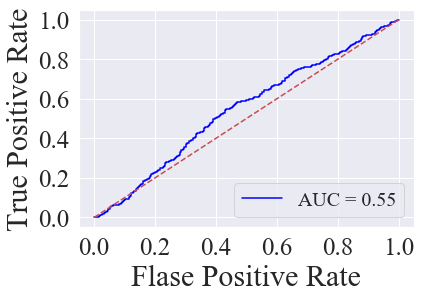

In [88]:
##欠采样
t_x,t_y,test_x,test_y = np.load('data/{}/trainx.npy'.format(test_year[0])),np.load('data/{}/trainy.npy'.format(test_year[0])),np.load('data/{}/testx.npy'.format(test_year[0])),np.load('data/{}/testy.npy'.format(test_year[0]))

rus = RandomUnderSampler(random_state=0)
train_x,train_y = rus.fit_resample(t_x,t_y)

tree = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=0.8
                                  , min_samples_split=100, min_samples_leaf=1, max_depth=3
                                  , init=None, random_state=111, max_features=None
                                  , verbose=0, max_leaf_nodes=None, warm_start=False)

tree.fit(train_x,train_y)
predict_target_prob=tree.predict_proba(test_x)  # 输出分类概率
predict_target_prob_dt=predict_target_prob[:,1]
predict_target_p0 = predict_target_prob[:,0]


##修改阈值
predict_target = []
for i in range(len(predict_target_prob)):
    if predict_target_prob[i][1] > 0.7:
        predict_target.append(1)
    elif predict_target_prob[i][1] <= 0.7:
        predict_target.append(0)
##


acc = accuracy_score(test_y, predict_target)
print("acc=", acc)

r1 = recall_score(predict_target,test_y)
print('recall=', r1)

r2 = precision_score(predict_target,test_y)
print('precision=', r2)

def Draw_ROC(list1,list2):
    fpr_model,tpr_model,thresholds=roc_curve(list1,list2,pos_label=1)
    roc_auc_model=auc(fpr_model,tpr_model)

    font = {'family': 'Times New Roman',
            'size': 12,
            }
    sns.set(font_scale=1.2)
    plt.rc('font',family='Times New Roman')

    plt.plot(fpr_model,tpr_model,'blue',label='AUC = %0.2f'% roc_auc_model)
    plt.legend(loc='lower right',fontsize = 20)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('True Positive Rate',fontsize = 30)
    plt.xlabel('Flase Positive Rate',fontsize = 30)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.show()
    return

t = Draw_ROC(test_y,predict_target_prob_dt)

### 最终的调参结果并不理想，最终我们采用之前的模型参数。

In [89]:
from prettytable import PrettyTable

table = PrettyTable(['Model','Sampleing','threshold','acc','recall','precision','AUC'])
table.align['sampling'] = '1'
table.padding_width = 1
table.add_row(['GBDT','Under-Sampling','0.7',0.56,0.38,0.60,0.60])

print(table)

+-------+----------------+-----------+------+--------+-----------+-----+
| Model |   Sampleing    | threshold | acc  | recall | precision | AUC |
+-------+----------------+-----------+------+--------+-----------+-----+
|  GBDT | Under-Sampling |    0.7    | 0.56 |  0.38  |    0.6    | 0.6 |
+-------+----------------+-----------+------+--------+-----------+-----+


### 以上为我们最终的模型结果

## 总结：
### 梯度提升树模型和其它模型相比，对于二分类问题表现出更优异的性能，但我们的数据集和鸢尾花数据集相比要复杂得多，所以经过很多优化依然不能有非常理想的结果，我们的数据集中类别的失衡，以及描述符特征本身准确与否都使得我们难以得到非常好的结果。
### 但通过以上实际案例，我们对梯度提升树和机器学习有了更深刻的理解，同时也深刻意识到好的机器学习结果更加取决与数据本身，一个好的数据集并不需要太多的处理就能得到好的结果，而在实际运用中机器学习的重点也更应该是对于数据的处理，后续我们会加强对于数据观察和处理的能力以完善机器学习应用的能力。